In [1]:
from imports import *

In [5]:
# Đọc dữ liệu từ file csv
df = pd.read_csv(r"D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\phantichpython\Group_Assign_Final\Data\ecommerce.csv", encoding='ISO-8859-1')

## 1. Tiền xử lý dữ liệu

### 1.1 Kiểm tra các thông tin tổng quan, thống kê cơ bản

In [6]:
# In 5 dòng đầu tiên
print("5 DÒNG ĐẦU TIÊN DỮ LIỆU")
print()
print(df.head())
print("-"*100)

# Kiểm tra tổng quan dữ liệu
# Biết dữ liệu có thiếu không, đồng nhất về kiểu dữ liệu không,
# trùng lặp không hay có ngoại lai hay không
print("Thông tin tổng quan dữ liệu")
print()
print(df.info())
print("-"*100)

# Thống kê cơ bản của dữ liệu
# Hiểu rõ cách phân bố của dữ liệu, có lệch không,
# biến động mạnh không, hợp lý không
print("Thống kê cơ bản của dữ liệu")
print()
print(df.describe())
print("-" * 100)

5 DÒNG ĐẦU TIÊN DỮ LIỆU

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
----------------------------------------------------------------------------------------------------
Thông tin tổng quan dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 e

### 1.2 Kiểm tra dữ liệu bị thiếu không

In [7]:
# Dữ liệu có thiểu không?
print("Kiểm tra dữ liệu có thiếu hay không")
print()
print(df.isnull().sum())

Kiểm tra dữ liệu có thiếu hay không

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


### 1.3 Kiểm tra dữ liệu có đồng nhất về kiểu dữ liệu

In [8]:
# Kiểm tra kiểu dữ liệu có đồng nhất không
print("Kiểm tra đồng nhất dữ liệu")
print()
for col in df.columns:
    data_types = df[col].apply(type).value_counts()
    if len(data_types) > 1:
        print(f"Cột '{col}' có nhiều kiểu dữ liệu:")
        print(data_types)
        print("-" * 50)
    else:
        print(f"Cột '{col}' đồng nhất với kiểu dữ liệu: {data_types.index[0]}")

Kiểm tra đồng nhất dữ liệu

Cột 'InvoiceNo' đồng nhất với kiểu dữ liệu: <class 'str'>
Cột 'StockCode' đồng nhất với kiểu dữ liệu: <class 'str'>
Cột 'Description' có nhiều kiểu dữ liệu:
Description
<class 'str'>      540455
<class 'float'>      1454
Name: count, dtype: int64
--------------------------------------------------
Cột 'Quantity' đồng nhất với kiểu dữ liệu: <class 'int'>
Cột 'InvoiceDate' đồng nhất với kiểu dữ liệu: <class 'str'>
Cột 'UnitPrice' đồng nhất với kiểu dữ liệu: <class 'float'>
Cột 'CustomerID' đồng nhất với kiểu dữ liệu: <class 'float'>
Cột 'Country' đồng nhất với kiểu dữ liệu: <class 'str'>


### 1.4 Kiểm tra dữ liệu có lặp lại không

In [9]:
# Kiểm tra có trùng lặp dữ liệu không
print("Kiểm tra dữ liệu có trùng lặp hay không")
print()
print("Số lượng dữ liệu trùng lặp: ",df.duplicated().sum())

Kiểm tra dữ liệu có trùng lặp hay không

Số lượng dữ liệu trùng lặp:  5268


### 1.5 Kiểm tra dữ liệu vô lý

In [10]:
(df.select_dtypes(include=['number']) < 0).sum()

Quantity      10624
UnitPrice         2
CustomerID        0
dtype: int64

# 2. Làm sạch dữ liệu

### 2.1 Loại bỏ dữ liệu bị thiếu

In [11]:
# Xử lý dữ liệu bị thiếu bằng cách xóa các hàng dữ liệu bị thiếu
# Xóa các dòng dữ liệu thiếu CustomerID
df = df.dropna(subset=['CustomerID'])

### 2.2 Loại bỏ dữ liệu bị trùng lặp

In [12]:
# Xóa các hàng dữ liệu bị lặp hoàn toàn
df.drop_duplicates(inplace=True)

### 2.3 Đồng nhất dữ liệu cột InvoiceID

In [13]:
# Đồng nhất dữ liệu cột InvoiceID để sử dụng cho việc chuyển đổi dữ liệu sau này
df['InvoiceNo'] = df['InvoiceNo'].astype(str)


### 2.4 Loại bỏ dữ liệu vô lý

In [14]:
df = df[(df['UnitPrice'] > 0) & (df['Quantity'] > 0)]

# 4. Chuyển đổi dữ liệu hóa đơn sang dữ liệu khách hàng

In [16]:
# 1. Chuyển đổi cột InvoiceDate sang kiểu datetime (vì giá trị InvoiceDate đang ở chuỗi string thay vì datetime)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 2. Tạo cột Monetary (giá trị đơn hàng)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# 3. Chọn ngày tham chiếu để tính Recency (thường là ngày lớn nhất + 1)
now = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# 4. Tính RFM
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (now - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                         # Frequency
    'TotalPrice': 'sum'                             # Monetary
}).reset_index()

# 5. Đổi tên cột cho rõ ràng
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# 6. (Tùy chọn) Kiểm tra tổng quan RFM
print(rfm.describe())

# 7. Ghi ra file Excel
rfm.to_csv(r'D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\phantichpython\Group_Assign_Final\Data\ecommerce_rfm.csv', index=False)
print("Đã lưu thành công vào file RFM_output.xlsx")


         CustomerID      Recency    Frequency       Monetary
count   4338.000000  4338.000000  4338.000000    4338.000000
mean   15300.408022    92.536422     4.272015    2048.688081
std     1721.808492   100.014169     7.697998    8985.230220
min    12346.000000     1.000000     1.000000       3.750000
25%    13813.250000    18.000000     1.000000     306.482500
50%    15299.500000    51.000000     2.000000     668.570000
75%    16778.750000   142.000000     5.000000    1660.597500
max    18287.000000   374.000000   209.000000  280206.020000
Đã lưu thành công vào file RFM_output.xlsx


# 3. Kiểm tra ngoại lai

### 3.1 Kiểm tra dữ liệu RFM_output có phân phối chuẩn hay không

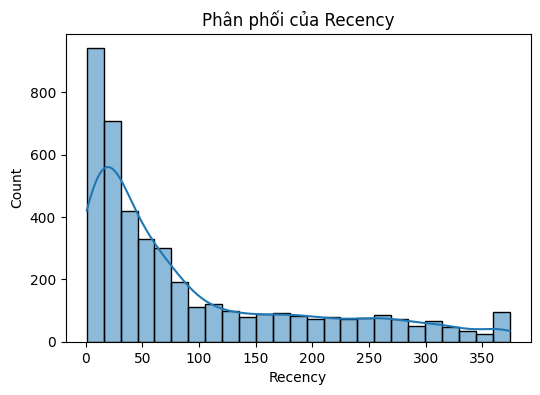

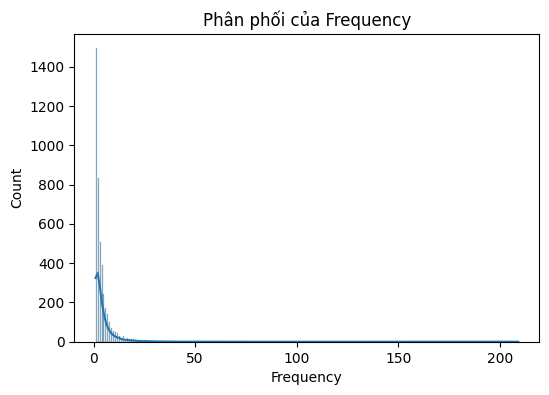

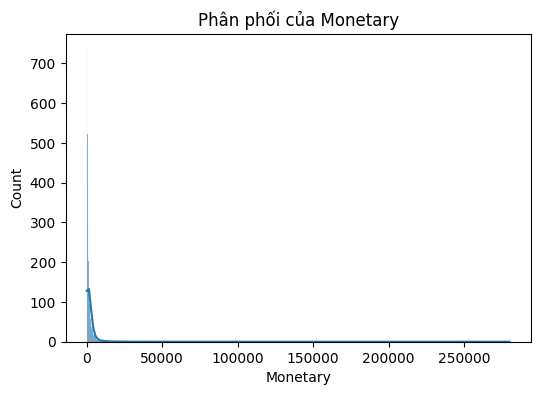

In [17]:
for col in ['Recency', 'Frequency', 'Monetary']:
    plt.figure(figsize=(6, 4))
    sns.histplot(rfm[col], kde=True)
    plt.title(f'Phân phối của {col}')
    plt.show()

### 3.2 Kiểm tra oulier

In [18]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Cột {column}:")
    print(f"  - Giới hạn dưới: {lower_bound:.2f}")
    print(f"  - Giới hạn trên: {upper_bound:.2f}")
    print(f"  - Số lượng outlier: {len(outliers)}")
    print("-" * 50)
    return outliers

# Gọi hàm cho 3 cột RFM
outliers_recency = detect_outliers_iqr(rfm, 'Recency')
outliers_frequency = detect_outliers_iqr(rfm, 'Frequency')
outliers_monetary = detect_outliers_iqr(rfm, 'Monetary')
# Kiểm tra xem có giá trị âm trong các cột RFM không
negative_values = (rfm[['Recency', 'Frequency', 'Monetary']] < 0).sum()

print("Số lượng giá trị âm trong từng cột RFM:")
print(negative_values)

Cột Recency:
  - Giới hạn dưới: -168.00
  - Giới hạn trên: 328.00
  - Số lượng outlier: 155
--------------------------------------------------
Cột Frequency:
  - Giới hạn dưới: -5.00
  - Giới hạn trên: 11.00
  - Số lượng outlier: 285
--------------------------------------------------
Cột Monetary:
  - Giới hạn dưới: -1724.69
  - Giới hạn trên: 3691.77
  - Số lượng outlier: 425
--------------------------------------------------
Số lượng giá trị âm trong từng cột RFM:
Recency      0
Frequency    0
Monetary     0
dtype: int64


### 3.3 Loại bỏ outliers

In [21]:
# Hàm loại bỏ outlier bằng phương pháp IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Tạo bản sao từ RFM gốc
rfm_clean = rfm.copy()

# Loại bỏ outliers từng cột RFM
for col in ['Recency', 'Frequency', 'Monetary']:
    rfm_clean = remove_outliers_iqr(rfm_clean, col)

# Kiểm tra lại số dòng còn lại
print(f"Số khách hàng còn lại sau khi loại bỏ outlier: {len(rfm_clean)}")

# (Tuỳ chọn) Ghi đè lại vào file Excel
output_path = r'D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\phantichpython\Group_Assign_Final\Data\ecommerce_rfm_clean.csv'
rfm_clean.to_csv(output_path, index=False)
print(f"Đã lưu dữ liệu sạch ra file: {output_path}")

Số khách hàng còn lại sau khi loại bỏ outlier: 3604
Đã lưu dữ liệu sạch ra file: D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\phantichpython\Group_Assign_Final\Data\ecommerce_rfm_clean.csv


# 4. Chuẩn hóa dữ liệu

In [22]:
# Giả sử rfm_clean là DataFrame sau khi loại bỏ outliers
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_clean[['Recency', 'Frequency', 'Monetary']])

# Chuyển về DataFrame để dễ sử dụng
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

# Nếu muốn gắn lại CustomerID:
rfm_scaled_df['CustomerID'] = rfm_clean['CustomerID'].values

# Kiểm tra
output_path = r'D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\phantichpython\Group_Assign_Final\Data\ecommerce_rfm_scaled.csv'
rfm_scaled_df.to_csv(output_path, index=False)